In [1]:
using Pkg, Revise
gla_dir = "../GenLinAlgProblems"
Pkg.activate(gla_dir)

using GenLinAlgProblems, LinearAlgebra, RowEchelon, Latexify, SymPy, Random
using AbstractAlgebra, BlockArrays
AbstractAlgebra.charpoly(A::Matrix) = charpoly(ZZ["x"][1], matrix(ZZ,A))

using PyCall
itikz = pyimport("itikz")
nM    = pyimport("itikz.nicematrix")
include(gla_dir*"/src/ge.jl");

  Activating project at `C:\Users\jeff\NOTEBOOKS\elementary-linear-algebra\GenLinAlgProblems`


<div style="float:center;width:100%;text-align:center;"><strong style="height:100px;color:darkred;font-size:40px;">Characteristic Polynomial using the Krylov Method</strong>
</div>

# 1. GhatGPT Description

Krylov spaces are a class of subspaces in linear algebra that are generated by applying a given matrix to a starting vector repeatedly, using a set of scalar coefficients. 

Krylov spaces are used in various ways in linear algebra and scientific computing, particularly in solving large and sparse linear systems of equations, eigenvalue problems, and other related problems. Here are some of the ways Krylov spaces are used:

* **Solving linear systems of equations:** Krylov methods, such as the conjugate gradient method, GMRES, and BiCGStab, are iterative methods that generate a sequence of approximate solutions that converge to the true solution of a linear system of equations. These methods construct a Krylov subspace of the matrix A and the initial residual vector b, and iteratively improve the solution using the information in this subspace.

* **Solving eigenvalue problems:** Krylov methods can also be used to compute eigenvalues and eigenvectors of a matrix. In particular, the Arnoldi iteration and the Lanczos iteration are Krylov-based methods for computing a partial or full set of eigenvalues and eigenvectors of a matrix.

* **Model reduction:** Krylov spaces can be used to reduce the size of large, complex mathematical models, such as those arising in fluid dynamics, electromagnetics, or structural mechanics. By projecting the original model onto a Krylov subspace, it is possible to approximate the solution with a smaller number of degrees of freedom, while preserving the essential properties of the original problem.

* **Matrix function approximation:** Krylov spaces can also be used to approximate matrix functions, such as exponentials, logarithms, or trigonometric functions of matrices. This is important in many scientific and engineering applications, such as in modeling dynamic systems, where matrix functions arise naturally in the mathematical models.

Overall, Krylov spaces provide a powerful tool for solving a wide range of problems in linear algebra and scientific computing, and their efficiency and versatility have made them a key ingredient in many computational tools and software packages.

# 2. Definition and Basic Properties

A Krylov space is a subspace of a vector space that is generated by applying a given matrix
to a starting vector repeatedly, using a set of scalar coefficients.

**Definition:** given a square matrix $A$ and a starting vector $v$, the Krylov space of order $n$ associated with $A$ and $v$ is defined as:

$\qquad
K_m (A, v) = span\left\{ v, A v, A^2 v, \dots, A^{m-1} v \right\}
$

**Remarks:**
* For a matrix of size $n \times n$ there cannot be more than $n$ linearly independent vectors in $K_m(A,v)$ for $m \ge n$.
* $K_m(A,v)$ is a subspace of the column space $\mathscr{C}(A)$, since each of the vectors in its definition lie in the column space of $A$.
* $K_1(A,v) \subseteq K_2(A,v)  \subseteq K_3(A,v) \dots  \subseteq K_m(A,v)$ for any $m$
* Let $n$ be the first index such that the vectors $\left\{ v, A v, A^2 v, \dots, A^{m-1}v \right\}$ are linearly dedependent.<br>
  then any vector $A^k v \in K_{n-1}(A,v)$ for $k \ge n$

* The discussion of the power method to find a dominant eigenpair shows that successive entries $A^k v$, $A^{k+1} v$ tend to become collinear:<br>
an explicit Krylov basis $\left\{ v, A v, A^2 v, \dots, A^{m-1} v \right\}$ is not suitable for numerical computing.
It is extremely ill-conditioned

Let $A$ be an invertible matrix.

**References:**
* [The idea behind KrylovMethods](https://www.math.uri.edu/~jbaglama/classes/2009-2010/spring/math513/Krylov.pdf)
* [Krylov Subspace Methods](https://pi.math.cornell.edu/~web6140/TopTenAlgorithms/KrylovSubspace.html)
* [Iterative Techniques](https://julia.quantecon.org/tools_and_techniques/iterative_methods_sparsity.html)

Solving $A x = b$ for large square matrices $A$.

Get a rough extimate of the solution $x$, say $x_0$, and set $x = x_0 + x_1$, thereby generating a problem for $x_1$:

$
\qquad A x = b \Rightarrow A x_1 = b - A x_0
$

Continuing in this manner, we set $x = x_1 + x_2$, so that

$
\qquad A x = b \Rightarrow A x_2 = b - A x_1 = A x_0
$

from Wikipedia

Because the vectors usually soon become almost linearly dependent due to the properties of power iteration, methods relying on Krylov subspace frequently involve some orthogonalization scheme, such as Lanczos iteration for Hermitian matrices or Arnoldi iteration for more general matrices.

# 3. Minimal Polynomial

The minimal polynomial $q(t)$ of A is the unique monic polynomial of minimal degree such that
$q(A) = 0$.

It is constructed from the eigenvalues of $A$ as follows. If the distinct eigenvalues of
$A$ are $\lambda_1, .. . ,\lambda_d$ and if $\lambda_j$ has index $m_j$ (the size of a largest Jordan block associated with $\lambda_j$), then the sum of all indices is

$\qquad m = \sum_{j=1}^{d}{m_j}$, and $q(t) = \prod_{j=1}^{d}{( t-\lambda_j )^m_j}$

For example, the matrix

$\qquad
\left(
\begin{array}{ccc|cc|c|c|c}
3 & \color{red}1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 3 & \color{red}1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 3 & 0 & 0 & 0 & 0 & 0 \\ \hline
0 & 0 & 0 & 3 & \color{red}1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 3 & 0 & 0 & 0 \\ \hline
0 & 0 & 0 & 0 & 0 & 2 & 0 & 0 \\ \hline
0 & 0 & 0 & 0 & 0 & 0 & 2 & 0 \\ \hline
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
\end{array}
\right)
$

has an eigenvalue 3 of index 3, an eigenvalue 2 of index 1, and an eigenvalue 1 of index 1.<br>
Thus $m = 5$ and $q(t) = (t−3)^3 (t-2) (t-1)$

**Special Cases:**
* When $A$ is diagonalizable, $m$ is the number of distinct eigenvalues of $A$.
* When A is a Jordan block of order $n$, then $m = n$.

**Remark:** Rewrite the minimal polynomial in the form $q(t) = \sum_{j=0}^{m}{ \alpha_j t^j }$.<br>
$\qquad$ The constant term of the minimal polynomial is $\alpha_0 = q(0) = \prod_{j=1}^{d}{(-\lambda_j )^m_j}$.<br>
$\qquad$ This term is non-zero iff $A$ is nonsingular, in which case
$$A^{-1} = - \frac{1}{\alpha_0} \sum_{j=0}^{m-1}{\alpha_{j+1}A^j}.$$

It follows that the solution $x = A^{-1} b$ is a member of a Krylov space $K_m (A, b)$:<br>
$\qquad$ If the minimal polynomial has low degree, then the Krylov space containing the solution is small,<br>
$\qquad$ and a Krylov method has an opportunity to converge fast

**Theorem:** the minimal polynomial is unique, and is a factor of the characteristic polynomial.

In [2]:
# compute a set of N+1 Krylov vectors, where matrix A has size N x N
function krylov_vectors( A, v )
    N = size(A,1)
    K = Array{eltype(A), 2}(undef, size(A))
    K[:,1] = v
    for i = 2:N
        v = A*v
        K[:,i] = v
    end
    [K A*v], rank(K)   # add one extra vector to K
end

krylov_vectors (generic function with 1 method)

In [3]:
# compute p(A), where p is the monic polynomial with coefficients [1, coeffs]
function eval_matrix_polynomial(A, coeffs)
    Z  = coeffs[1]*I(size(A,1))
    for α ∈ coeffs[2:end]
        Z = A*Z+α*I
    end
    Z
end;

## 3.1 Different Eigenvalues

In [4]:
Random.seed!(2334)
S,Λ,Sinv = gen_eigenproblem( [1,2,-1,-2])
A=S*Λ*Sinv

4×4 Matrix{Int64}:
  200    58   -45  -19
 -383  -111    85   37
  171    49   -40  -16
  529   155  -119  -49

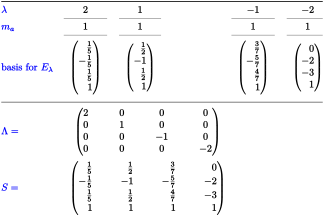

In [5]:
nM.show_eig_tbl(A,fig_scale=1, mmLambda=11, tmp_dir="../../tmp" )

In [6]:
K,r = krylov_vectors( A, e_i(1,size(A,1)) )
K[:,1:r]

4×4 Matrix{Int64}:
 1   200   40   278
 0  -383   21  -581
 0   171  129    69
 0   529  165   979

The Cayley-Hamilton Theorem states that every matrix satisfies its characteristic polynomial.<br>
$\qquad$ i.e., given a matrix $A$ with characteristic polynomial<br>
$\qquad
p(\lambda) = \lambda^n + \alpha_{n-1} \lambda^{n-1} + \dots + \alpha_0,
\qquad$
we have <br>
$\qquad p(A) = A^n + \alpha_{n-1} A^{n-1} + \dots + \alpha_0 I = 0$

Pick a vector $x$ and compute $p(A)x$. This yields

$$
A^n x + \alpha_{n-1} A^{n-1} x + \dots + \alpha_0 x = 0,
$$
a set of equations for the coefficients $\alpha_i$ multiplied by the Krylov vectors $A^k x$.

In [7]:
# the characteristic polynomial of A
charpoly(A)

λ^4 - 5*λ^2 + 4

In [8]:
# The coefficients of the characteristic polynomial using Krylov's Method
# Since we set up the problem with integer eigenvalues, the coefficients are integers
coeffs = pushfirst!( Int.(round.(K[:,1:r] \ (-K[:,r+1])))[end:-1:1], 1 )'

1×5 adjoint(::Vector{Int64}) with eltype Int64:
 1  0  -5  0  4

In [9]:
# check that this is an anihilator polynomial
eval_matrix_polynomial(A,coeffs)

4×4 Matrix{Int64}:
 0  0  0  0
 0  0  0  0
 0  0  0  0
 0  0  0  0

## 3.2 Repeated Eigenvalues, Diagonalizable

#### Minimal Polynomial

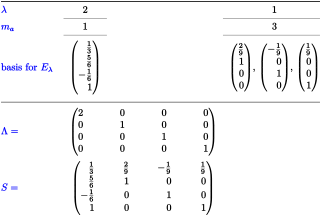

In [10]:
Random.seed!(2335)
S,Λ,Sinv = gen_eigenproblem( [1,1,1,2])
A=S*Λ*Sinv
nM.show_eig_tbl(A,fig_scale=1, mmLambda=13, tmp_dir="../../tmp" )

In [11]:
K,r = krylov_vectors( A, e_i(1,size(A,1)) )
K[:,1:r]

4×2 Matrix{Int64}:
 1  19
 0  45
 0  -9
 0  54

In [12]:
println("charpoly(A) = ", charpoly(A))
coeffs = pushfirst!(Int.(round.(K[:,1:r] \ (-K[:,r+1])))[end:-1:1],1)'

charpoly(A) = λ^4 - 5*λ^3 + 9*λ^2 - 7*λ + 2


1×3 adjoint(::Vector{Int64}) with eltype Int64:
 1  -3  2

In [13]:
eval_matrix_polynomial(A, coeffs)

4×4 Matrix{Int64}:
 0  0  0  0
 0  0  0  0
 0  0  0  0
 0  0  0  0

In [14]:
Random.seed!(34252)
S,Λ,Sinv = gen_eigenproblem( [1,2,1,2,1,2,3])
A=S*Λ*Sinv
K,r = krylov_vectors( A, e_i(1,size(A,1)) )
coeffs = pushfirst!(Int.(round.(K[:,1:r] \ (-K[:,r+1])))[end:-1:1],1)'
println("rank(K) = $r")
println("charpoly(A) = ", charpoly(A))
println("coeffs      = ", coeffs)
eval_matrix_polynomial(A, coeffs)

rank(K) = 3
charpoly(A) = -λ^7 + 12*λ^6 - 60*λ^5 + 162*λ^4 - 255*λ^3 + 234*λ^2 - 116*λ + 24
coeffs      = [1 -6 11 -6]


7×7 Matrix{Int64}:
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0

## 3.3 Repeated Eigenvalues, non-diagonalizable

In [15]:
Random.seed!(342)
A = gen_from_jordan_form([jordan_block(2,3), jordan_block(2,1), Diagonal([1,-1,3])]; maxint=1)

7×7 Matrix{Int64}:
  16   3    5  -11   4    5   2
  12   5    5   -9   3    4   2
 -36  -7  -12   28  -8  -14  -6
  18   5    7  -12   5    6   3
   3   2    2   -2   2    1   1
  -3   0   -1    3   0    0  -1
  50  11   20  -40  10   20  12

In [16]:
K,r = krylov_vectors( A, e_i(1,size(A,1)) )
coeffs = pushfirst!(Int.(round.(K[:,1:r] \ (-K[:,r+1])))[end:-1:1],1)'
println("rank(K) = $r")
println("charpoly(A) = ", charpoly(A))
println("coeffs      = ", coeffs)
eval_matrix_polynomial(A, coeffs)

rank(K) = 6
charpoly(A) = -λ^7 + 11*λ^6 - 47*λ^5 + 93*λ^4 - 64*λ^3 - 56*λ^2 + 112*λ - 48
coeffs      = [1 -9 29 -35 -6 44 -24]


7×7 Matrix{Int64}:
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0

In [17]:
Random.seed!(3442)
A = gen_from_jordan_form([jordan_block(2,3), jordan_block(2,3), Diagonal([2,-1,3])]; maxint=1)
K,r = krylov_vectors( A, e_i(1,size(A,1)) )
coeffs = pushfirst!(Int.(round.(K[:,1:r] \ (-K[:,r+1])))[end:-1:1],1)'
println("rank(K) = $r")
println("charpoly(A) = ", charpoly(A))
println("coeffs      = ", coeffs)
eval_matrix_polynomial(A, coeffs)

rank(K) = 4
charpoly(A) = -λ^9 + 16*λ^8 - 109*λ^7 + 406*λ^6 - 868*λ^5 + 952*λ^4 - 112*λ^3 - 992*λ^2 + 1088*λ - 384
coeffs      = [1 -5 6 4 -8]


9×9 Matrix{Int64}:
 0  -8   12  -8  -4  0  0  -4  -4
 0  -8   12  -8  -4  0  0  -4  -4
 0   0    0   0   0  0  0   0   0
 0  -8   12  -8  -4  0  0  -4  -4
 0   0    0   0   0  0  0   0   0
 0  16  -24  16   8  0  0   8   8
 0  16  -24  16   8  0  0   8   8
 0   0    0   0   0  0  0   0   0
 0  40  -60  40  20  0  0  20  20

**This did not work! Only some of the rows and columns were annihilated**<br>
**Other examples will work however**

____
**Idea:** Augment the Krylov Matrix by adding other starting vectors<br>
$\qquad$ We want vectors that are not in the current columnspace $\mathscr{C}(K)$<br>
$\qquad$ E.g., use a vector in $\mathscr{N}(K^t)$ 

In [18]:
function find_col_space_complement(K, r)
    R = RowEchelon.rref( [Rational.(K) I] )[r+1:end, size(K,2)+1:end]
    _,R = factor_out_denominator(A)
    R'
end
#K'*find_col_space_complement(K, r)
function add_krylov_subspace(K,r)
    v    = find_col_space_complement(K, r)[:,1]
    KK,r = krylov_vectors( A, v )
    K    = [K; KK]
    r    = rank(K)
    KK,r
end
;

In [19]:
# Augment K (resulting in more equations for the charpoly coefficients)
K,r = add_krylov_subspace(K,r)

coeffs = pushfirst!(Int.(round.(K[:,1:r] \ (-K[:,r+1])))[end:-1:1],1)'
println("rank(K) = $r")
println("charpoly(A) = ", charpoly(A))
println("coeffs      = ", coeffs)
eval_matrix_polynomial(A, coeffs)

rank(K) = 5
charpoly(A) = -λ^9 + 16*λ^8 - 109*λ^7 + 406*λ^6 - 868*λ^5 + 952*λ^4 - 112*λ^3 - 992*λ^2 + 1088*λ - 384
coeffs      = [1 -8 21 -14 -20 24]


9×9 Matrix{Int64}:
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0

# 3.4 Other Problems

In [20]:
Random.seed!(3442)
A = gen_from_jordan_form([jordan_block(3,6), jordan_block(-10,4), Diagonal([2,-10,3])]; maxint=3)
K,r = krylov_vectors( A, e_i(1,size(A,1)) )
coeffs = pushfirst!(Int.(round.(K[:,1:r] \ (-K[:,r+1])))[end:-1:1],1)'
println("rank(K) = $r")
println("charpoly(A) = ", charpoly(A))
println("coeffs      = ", coeffs)
eval_matrix_polynomial(A, coeffs)

rank(K) = 8
charpoly(A) = -λ^13 - 27*λ^12 - 81*λ^11 + 2773*λ^10 + 10425*λ^9 - 162477*λ^8 - 221659*λ^7 + 5819943*λ^6 - 10913724*λ^5 - 74765700*λ^4 + 431406000*λ^3 - 954990000*λ^2 + 1020600000*λ - 437400000
coeffs      = [1 12 -123 -1093 7875 19189 -233999 580401 95380057]


13×13 Matrix{Int64}:
   1790071925140  -1364746681529    432795971698  …   1133800936    636415983
   1633857258039  -1245599212166    395034384099      1029591867    581581727
  -3385625412526   2581276049786   -818479007906     -2145607706  -1204803389
   -959072135457    731492724903   -232053025038      -640416446   -336045706
   8913480448295  -6795760000650   2155037637267      5611476488   3180923209
  -8544540755364   6514705118896  -2065979780911  …  -5408145349  -3045133076
   9828563475614  -7493201528717   2376137040372      6157726338   3513341379
   5593783697732  -4264663285566   1352359456295      3521140487   1993072374
  -7897089979172   6021010149067  -1909394177658     -4971326532  -2821903402
  -7721337564969   5887168856364  -1867003931020     -4883689543  -2757096309
 -14971406416925  11414755928303  -3619907383680  …  -9498738205  -5324985134
   7709196689409  -5877727167992   1863967316098      4999581850   2735715942
  12151918183931  -9264546916458   29378654

**The values are huge! (they could overflow)**

In [21]:
K

13×14 Matrix{Int64}:
 1    9341217   -17726252    574724819   -4092215723  …   4870399884505290619
 0    8726462   -29124276    573306139   -4290996825      3561966149953595574
 0  -12322662    37637079   -817494358    7185594309      7187580626338760316
 0  -10021802   -67100525   -387821813    -280221232     -4918208051440176254
 0   21183767  -253514307   2158395687  -23635376908      5642929262617262691
 0  -18040773   216490705  -1954550978   21264561191  …  -6725308837871511323
 0   25305940  -302117847   2430521864  -27252382558      6645291659477864852
 0   16026450  -146911864   1387436924  -14767630833     -3288594774982387144
 0  -11043275   285279589  -1702839222   22379887178     -2315708287246920463
 0  -19532453   135488763  -1724600445   17214059879     -6763597899870299477
 0  -58426532   181066303  -4054109283   32846277296  …  -9170504950340209264
 0   32740879   -57471957   2139715879  -15825185567      6235564911618006235
 0   40585607  -273518099   3165512827  -30

In [22]:
println( "Angle between successive Krylov vectors")
angles  = []
lengths = []
for j in 2:size(K,2)
    u=K[:,j-1]
    v=K[:,j]
    push!(lengths, norm(v) )
    a =  round(180/π * acos(u ⋅ v /( norm(u) * norm(v))), digits=5 )
    push!(angles,a)
    println( a )
end

Angle between successive Krylov vectors
84.26004
141.89466
153.07103
90.65336
90.00924
89.99999
90.0
90.0
90.0
90.0
90.0
90.0
90.0


**The angles quickly get parallel**

Actually the successive $A^k v$ vectors are the result of a power iteration, which
should converge to an eigenvector for a dominant eigenvalue.

A story for another day

# Other Stuff

____
**Idea:** orthogonalize the vectors using QR
* Arnoldi algorithm for geneneral vectors

In [23]:
A = Rational.(BigInt.(gen_qr_problem(8)))
Q,R=gram_schmidt_stable(A, reorthogonalize=true)
@show A ≈ Q*R;

A ≈ Q * R = false


In [40]:
print( "|| A - Q R || = ", norm(A-Q*R))

|| A - Q R || = 2.349899218380882528924061384180586409895727213987770714325917262487760833089243e-15

In [24]:
round.(Q*R-A, digits=20)

8×8 Matrix{BigFloat}:
 0.0  -0.0  -0.0  -0.0   0.0   0.0   0.0   0.0
 0.0   0.0   0.0   0.0  -0.0  -0.0   0.0  -0.0
 0.0   0.0   0.0   0.0  -0.0  -0.0   0.0  -0.0
 0.0  -0.0  -0.0  -0.0   0.0   0.0   0.0   0.0
 0.0  -0.0  -0.0   0.0  -0.0  -0.0  -0.0  -0.0
 0.0   0.0   0.0   0.0   0.0  -0.0  -0.0   0.0
 0.0   0.0   0.0  -0.0   0.0   0.0  -0.0   0.0
 0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0

In [25]:
R=Float64.(R)
Q=Float64.(Q)

8×8 Matrix{Float64}:
 -0.353553   0.353553  -0.353553  …   0.353553   0.353553  -0.353553
  0.353553  -0.353553  -0.353553      0.353553  -0.353553  -0.353553
  0.353553  -0.353553   0.353553      0.353553   0.353553  -0.353553
 -0.353553   0.353553   0.353553      0.353553  -0.353553  -0.353553
 -0.353553  -0.353553  -0.353553     -0.353553   0.353553  -0.353553
  0.353553   0.353553  -0.353553  …  -0.353553  -0.353553  -0.353553
  0.353553   0.353553   0.353553     -0.353553   0.353553  -0.353553
 -0.353553  -0.353553   0.353553     -0.353553  -0.353553  -0.353553

In [26]:
round.(R, digits=2)

8×8 Matrix{Float64}:
 2.83  0.0   0.0   0.0   0.0   0.0   0.0   0.0
 0.0   5.66  0.0   0.0   0.0   0.0   0.0   0.0
 0.0   0.0   8.49  0.0   0.0   0.0   0.0   0.0
 0.0   0.0   0.0   8.49  0.0   0.0   0.0   0.0
 0.0   0.0   0.0   0.0   5.66  0.0   0.0   0.0
 0.0   0.0   0.0   0.0   0.0   2.83  0.0   0.0
 0.0   0.0   0.0   0.0   0.0   0.0   5.66  0.0
 0.0   0.0   0.0   0.0   0.0   0.0   0.0   8.49

In [27]:
round.(Q'Q, digits=3)

8×8 Matrix{Float64}:
  1.0  -0.0   0.0  -0.0  -0.0  -0.0  -0.0   0.0
 -0.0   1.0  -0.0   0.0   0.0   0.0   0.0  -0.0
  0.0  -0.0   1.0  -0.0  -0.0  -0.0  -0.0   0.0
 -0.0   0.0  -0.0   1.0   0.0   0.0   0.0  -0.0
 -0.0   0.0  -0.0   0.0   1.0   0.0   0.0  -0.0
 -0.0   0.0  -0.0   0.0   0.0   1.0   0.0  -0.0
 -0.0   0.0  -0.0   0.0   0.0   0.0   1.0  -0.0
  0.0  -0.0   0.0  -0.0  -0.0  -0.0  -0.0   1.0